In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

def reading_data(PATH,sheet):
    if PATH.endswith('xlsx'):
        x = pd.read_excel(PATH,sheet_name=sheet)
    if PATH.endswith('csv'):
        x = pd.read_csv(PATH)
    return x

AC_charac = 'data/1. AC characteristics/ACchar.xlsx'


In [2]:
## reading aircraft characteristics
df_charac = reading_data(AC_charac,'test')

df_charac.head(3)

,Date Completed,Manufacturer,Model,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed (Vref),Wingtip Configuration,...,MGW (Outer to Outer),MTOW,Max Ramp Max Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1,A,I,1A,55.9,no winglets,...,tbd,1350,1520,S,ACRO,L,Small Eqpt,tbd,tbd,342.708
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1,A,I,1A,59.8,no winglets,...,tbd,1520,1520,S,ACR2,L,Small Eqpt,tbd,tbd,408.507
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1,A,I,1A,45.5,no winglets,...,tbd,1250,1250,S,COUG,L,Small Eqpt,tbd,tbd,387.792


In [3]:
##size of the dataset - number of unique values 
print('# line:                           '+ str(df_charac.shape[0]))
df_charac.drop_duplicates(keep=False,inplace=True)
print('# line after delete duplicate     '+ str(df_charac.shape[0]))
print('-----------------------------------------------------------')
print(df_charac.nunique())

# line:                           2764
# line after delete duplicate     2753
-----------------------------------------------------------
Date Completed                      72
Manufacturer                       424
Model                             2561
Physical Class (Engine)              8
# Engines                            6
AAC                                  6
ADG                                  8
TDG                                 10
Approach Speed\n(Vref)             159
Wingtip Configuration               21
Wingspan, ft                       383
Length, ft                         371
Tail Height, ft\n(@ OEW)           361
Wheelbase, ft                      172
Cockpit to Main Gear (CMG)         172
MGW\n(Outer to Outer)              128
MTOW                               541
Max Ramp\nMax Taxi                 426
Main Gear Config                    11
ICAO Code                         1239
Wake Category                        4
ATCT Weight Class                    7
Year

In [4]:
## abbreviation to understand in column name 
print('AAC (Aircraft Approach Category)  for a runway is based on the reference landing speed of the design aircraft')
print('ADG (Airplane Design Group) considers the aircraft wingspan')
print('TDG (Taxiway Design Group) considers the aircraft gear configuration-main gear width and cockpit to main gear-spacing')
print('MGW considers the wheel to wheel span of an aircraft')
print('MTOW is Max Takeoff Weight')
print('Max Ramp is maximum weight authorised for manoeuvring (taxiing or towing) an aircraft on the ground')
print('ICAO (aircraft type designator) is a code designating every aircraft type (and some sub-types) that may fly')
print('Wake category is Wake turbulence categories based upon the Maximum Takeoff Weight (MTOW) of the aircraft')
print('ATCT Weight Class - Cant find a definition maybe Air traffic control')

AAC (Aircraft Approach Category)  for a runway is based on the reference landing speed of the design aircraft
ADG (Airplane Design Group) considers the aircraft wingspan
TDG (Taxiway Design Group) considers the aircraft gear configuration-main gear width and cockpit to main gear-spacing
MGW considers the wheel to wheel span of an aircraft
MTOW is Max Takeoff Weight
Max Ramp is maximum weight authorised for manoeuvring (taxiing or towing) an aircraft on the ground
ICAO (aircraft type designator) is a code designating every aircraft type (and some sub-types) that may fly
Wake category is Wake turbulence categories based upon the Maximum Takeoff Weight (MTOW) of the aircraft
ATCT Weight Class - Cant find a definition maybe Air traffic control


In [12]:
matching = pd.read_pickle('Correspondance.pkl')


,AirportData,Accharac
0,73S,737-200
1,7HB,737-700 with winglets


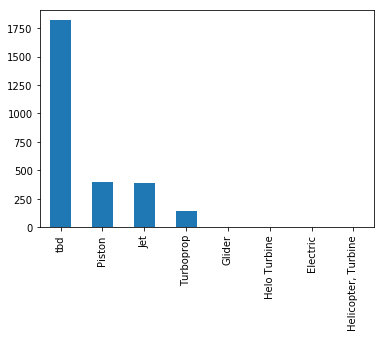

In [5]:
#exploring repartition of each variable

df_charac['Physical Class (Engine)'].value_counts().plot.bar()
